# morphoscanner - alpha-helix tutorial

`morphoscanner` includes functionalities to study the *alpha-helix* secondary structure, on peptides and proteins.

In this tutorial we will use one of the `.pdb` included in `morphoscanner` as sample data: `3bep`.

`3bep` is a complex of *DNA* and a *sliding clamp* protein dimer. [Here](https://www.rcsb.org/structure/3BEP) for more information on the complex.

We will need `nglView` package to visualize the structures. `nglView` ***is not installed*** with `morphoscanner`, so you have to install in your environment. The [nglview repository](https://github.com/nglviewer/nglview) contains all the necessary information to do it.

I copy-pasted below their installation paragraph found in the README.md, to make everything easier.

Installation of nglview -- [link](https://github.com/nglviewer/nglview#installation)
============

Released version
----------------

- Available on `conda-forge` channel

    ```bash
    conda install nglview -c conda-forge
    # might need: jupyter-nbextension enable nglview --py --sys-prefix

    # if you already installed nglview, you can `upgrade`
    conda upgrade nglview --force
    # might need: jupyter-nbextension enable nglview --py --sys-prefix
    ```

- Available on [PyPI](https://pypi.python.org/pypi/nglview/)

```bash
   pip install nglview
   # might need: jupyter-nbextension enable nglview --py --sys-prefix
```

Jupyterlab: `nglview` works best with jupyterlab >= 3.0 and no further steps needed.

## Notes

If you are using `notebook` v5.0, you need to increase the `iopub_data_rate_limit`
to [visualize big structure (e.g: solvated system)](https://github.com/arose/nglview/issues/633)

```
jupyter notebook --NotebookApp.iopub_data_rate_limit=10000000
```

Done with the setup, we can start to import what we will need.

In [1]:
import morphoscanner
import matplotlib.pyplot as plt
import numpy as np
import nglview as nv
import pandas as pd

In [ ]:
%matplotlib notebook

## Load the data

We will use our sample protein structure. To load your own structure, or trajectory, pass their datapath to the class instance.

In [2]:
loader = morphoscanner.data_sample.loader.dataloader()

## Analysis

The workflow is the same, used both for a single topology, or for a trajectory.

Since here we are using a `.pdb` topology, `morphoscanner` finds a single frame.

In [3]:
struct = morphoscanner.trajectory.trajectory(loader.pdb_3bep,select=['aminoacids'])

In your trajectory there are 1 frames.



The complex is composed by a dimer and a DNA helix. The dimer is found as two separate proteins, but the helix is not found by `morphoscanner`, since its atom type definitions are not in `morphoscanner` dictionary at the moment.

In [4]:
struct.explore()

Length: 366, Peptides: 2
Exploration of frame 0 done.



We can now visualize the complex. You can turn on the interactive visualization to have a better look:

In [5]:
%matplotlib notebook

<IPython.core.display.Javascript object>


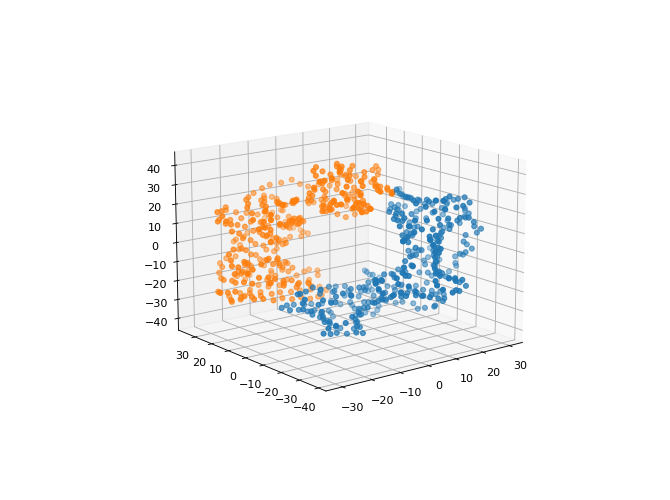

In [6]:
struct.plot_frame(0)

In [7]:
%matplotlib inline

In this specific case it is possible to skip the `compose_database` command, since we only have 1 frame, that has already been read. I will put it here anyway, to have a complete workflow.


In [8]:
struct.compose_database()

sampling_interval CAN NOT be more than 1 .
 sampling_interval is:  1


We can nowperform the analysis, and collect the data.

In [9]:
struct.analyze_inLoop()

processing started...

Analyzing frame n°  0
Time to compute distance is:  0.014137150999886217 seconds.


100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 7928.74it/s]

Time to denoise:  0.8069944219996614 seconds.
Finished analysis of frame n° 0
Time needed to analyze frame 0 was 0.842527 seconds.

Total time to analyze dataset was 0.842577 seconds
.


In [10]:
struct.get_data()

In [11]:
struct.database

,n° of peptides in macroaggregates,parallel,antiparallel,n° of macroaggreates,0
0,[2],0,1,1,"{'parallel': 0, 'antiparallel': 1}"


At this point we have ran our standard workflow. We can now perform additional analysis, to study the alpha-helix structures.

## Alpha helix

To perform the analysis we need one additional command.

In [12]:
struct.helix_score()

When the analysis ends, we will have a pandas.DataFrame for each frame (only one in this case), with the output of the analysis.

In [13]:
struct.frames[0].results.helix_score

,pace_helix,n_carbonalpha,perc_alpha,length_beta,n_carbonbeta,perc_beta,explored_alpha,explored_beta
0,4.010985,90,24.590164,9.022447,92,25.136612,"[8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,...","[42, 52, 55, 56, 57, 58, 63, 64, 65, 66, 67, 6..."
1,3.989136,90,24.590164,9.0235,88,24.043716,"[8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 20,...","[42, 52, 56, 57, 58, 63, 65, 66, 67, 68, 70, 7..."


Each row of the above database refer, in this case, to a subunit of the the beta-clamp dimer.

Here we focus on one of the output that we just obtained: ***explored_alpha***.

*explored_alpha* contains the index of the residues that partecipate in an alpha-helical secondary structure, as found from `morphoscanner` searching algorithm.

We use the following code to get the indices, and to transform it in a suitable format to be retrived from `MDAnalysis.Universe`, and then be visualized with `nglview`.

### Visualization methods with `nglview`

We have the residues index, and we want to represent them visually. The complex we are studying has two subunit, each called *segment* in `MDAnalysis.Universe`.

We show here some methods to get the representation we need. Others methods are possible, using the rules found in the [official documentation](https://docs.mdanalysis.org/1.1.1/documentation_pages/selections.html#selection-commands).

We focus on the subunit with *index 0*, that correspond to the *segment A* in `MDAnalysis.Universe`.

In [110]:
%pprint

Pretty printing has been turned OFF


#### Get the indices

We need the index of the residues that are involved in the alpha-helix.

In [113]:
alpha_idx0 = [i for i in struct.frames[0].results.helix_score.explored_alpha[0]]

In [121]:
alpha_idx0

[8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 29, 30, 31, 41, 51, 73, 74, 75, 76, 77, 78, 79, 80, 81, 96, 104, 114, 115, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 144, 145, 152, 154, 166, 176, 199, 200, 201, 202, 203, 204, 205, 206, 222, 245, 246, 247, 251, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 277, 289, 299, 300, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 344, 345, 354]

### Show the alpha carbon of the helix

To retrive and show only the C-alpha of the residues we will need the corresponding *atom_id*.

In [116]:
atom_id0 = [struct.frames[0].peptides[0].atom_numbers[i] for i in struct.frames[0].peptides[0].atom_numbers if i in set(alpha_idx0)]

In [120]:
atom_id0

[560, 570, 578, 586, 595, 602, 610, 619, 628, 635, 641, 645, 652, 716, 724, 728, 800, 873, 1035, 1044, 1055, 1066, 1074, 1082, 1088, 1099, 1103, 1215, 1276, 1350, 1358, 1509, 1516, 1524, 1533, 1544, 1552, 1560, 1569, 1574, 1581, 1601, 1607, 1665, 1689, 1783, 1861, 2025, 2032, 2040, 2049, 2057, 2065, 2076, 2084, 2200, 2392, 2403, 2410, 2442, 2516, 2524, 2532, 2541, 2550, 2555, 2566, 2571, 2582, 2587, 2592, 2600, 2608, 2640, 2743, 2821, 2830, 2997, 3009, 3016, 3024, 3032, 3039, 3047, 3055, 3060, 3068, 3170, 3176, 3239]

`MDAnalysis.Universe` needs a `str` type for the request. We do not need to specify segment A, since *atom_id* are unique.

In [123]:
atom_id0str = ' '.join([str(i) for i in atom_id0])

In [124]:
atom_id0str

'560 570 578 586 595 602 610 619 628 635 641 645 652 716 724 728 800 873 1035 1044 1055 1066 1074 1082 1088 1099 1103 1215 1276 1350 1358 1509 1516 1524 1533 1544 1552 1560 1569 1574 1581 1601 1607 1665 1689 1783 1861 2025 2032 2040 2049 2057 2065 2076 2084 2200 2392 2403 2410 2442 2516 2524 2532 2541 2550 2555 2566 2571 2582 2587 2592 2600 2608 2640 2743 2821 2830 2997 3009 3016 3024 3032 3039 3047 3055 3060 3068 3170 3176 3239'

Now we need to add the proper request command to the atom list.

In [129]:
atom_id0_call = 'index ' + atom_id0str

In [130]:
atom_id0_call

'index 560 570 578 586 595 602 610 619 628 635 641 645 652 716 724 728 800 873 1035 1044 1055 1066 1074 1082 1088 1099 1103 1215 1276 1350 1358 1509 1516 1524 1533 1544 1552 1560 1569 1574 1581 1601 1607 1665 1689 1783 1861 2025 2032 2040 2049 2057 2065 2076 2084 2200 2392 2403 2410 2442 2516 2524 2532 2541 2550 2555 2566 2571 2582 2587 2592 2600 2608 2640 2743 2821 2830 2997 3009 3016 3024 3032 3039 3047 3055 3060 3068 3170 3176 3239'

We could have done the above with a single line:

In [135]:
atom_id0_call = 'index '+' '.join([str(struct.frames[0].peptides[0].atom_numbers[i]) for i in struct.frames[0].peptides[0].atom_numbers if i in set(alpha_idx0)])

In [136]:
atom_id0_call

'index 560 570 578 586 595 602 610 619 628 635 641 645 652 716 724 728 800 873 1035 1044 1055 1066 1074 1082 1088 1099 1103 1215 1276 1350 1358 1509 1516 1524 1533 1544 1552 1560 1569 1574 1581 1601 1607 1665 1689 1783 1861 2025 2032 2040 2049 2057 2065 2076 2084 2200 2392 2403 2410 2442 2516 2524 2532 2541 2550 2555 2566 2571 2582 2587 2592 2600 2608 2640 2743 2821 2830 2997 3009 3016 3024 3032 3039 3047 3055 3060 3068 3170 3176 3239'

Now we can ask the `Universe` to give us the atoms we need.

In [131]:
c_alpha_seg0 = struct.universe.select_atoms(atom_id0_call)

Is now possible to visualize the atoms with `nglview`.

In [132]:
nv.show_mdanalysis(c_alpha_seg0)

NGLWidget()

### Show the residues

Some times can be more informative to show the entire residues instead of visualizing only the C-alpha.

Here we need to know to which segment our atoms belong. In our case we know that is *segment A*.

We can check wich segments are in our universe:

In [139]:
segs = [i for i in struct.universe.segments]

In [140]:
print(segs)

[<Segment C>, <Segment D>, <Segment A>, <Segment B>, <Segment C>, <Segment D>, <Segment A>, <Segment B>]


In this case we see that we have, in order, Segment C, D, A, B, and the again the same letters as ids. Looking at the `.pdb` file of our complex, we see that only the first four segment are of our interest, and between these four only C and D are our subunits, while C and D are DNA filaments.

We can have a look at these with `nglview`.

In [151]:
nv.show_mdanalysis(struct.universe.segments[:2])

NGLWidget()

In [153]:
nv.show_mdanalysis(struct.universe.segments[2:4])

NGLWidget()

From the above renders it is clear that the entry with index 0 and 1, that are segment C and D, represents the DNA helix. Segment A and B are our two subunit, and since the parsing follows the order of the `.pdb` file, segment A correspond to our peptide with index 0, as read by `morphoscanner`.

So we can get the residues of interest from segment A.

We use the indices we have collected after the analysis:

In [156]:
alpha_idx0

[8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 29, 30, 31, 41, 51, 73, 74, 75, 76, 77, 78, 79, 80, 81, 96, 104, 114, 115, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 144, 145, 152, 154, 166, 176, 199, 200, 201, 202, 203, 204, 205, 206, 222, 245, 246, 247, 251, 261, 262, 263, 264, 265, 266, 267, 268, 269, 270, 271, 272, 273, 277, 289, 299, 300, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 344, 345, 354]

In [160]:
res_segA_alpha_call = 'segid A ' + 'and ' + 'resid '+' '.join([str(i) for i in alpha_idx0])

In [161]:
res_segA_alpha_call

'segid A and resid 8 9 10 11 12 13 14 15 16 17 18 19 20 29 30 31 41 51 73 74 75 76 77 78 79 80 81 96 104 114 115 133 134 135 136 137 138 139 140 141 142 144 145 152 154 166 176 199 200 201 202 203 204 205 206 222 245 246 247 251 261 262 263 264 265 266 267 268 269 270 271 272 273 277 289 299 300 322 323 324 325 326 327 328 329 330 331 344 345 354'

In [162]:
segA_alpha = struct.universe.select_atoms(res_segA_alpha_call)

In [168]:
view_segA = nv.show_mdanalysis(segA_alpha)

In [169]:
view_segA

NGLWidget()

In [166]:
view_segA.remove_ball_and_stick()
view_segA.add_cartoon()

In [167]:
view_segA

NGLWidget(n_components=1)

## Start example of a wrong behaviour 

### Pitfall of using `MDAnalysis.Universe` and `nglsview` in visualization (at least the one we know)

Pay attention when you have homologous dimers like the one we use as a sample here! It is tempting to just ask `MDAnalysis.Universe` to give us the residues that `morphoscanner` reports as part of alpha helical structures.

This is what happens if we do that!

#### convert to string

Convert to string the explored alpha carbon of segment A.

In [170]:
alpha_str = ' '.join(str(i) for i in struct.frames[0].results.helix_score.explored_alpha[0])

In [171]:
alpha_str

'8 9 10 11 12 13 14 15 16 17 18 19 20 29 30 31 41 51 73 74 75 76 77 78 79 80 81 96 104 114 115 133 134 135 136 137 138 139 140 141 142 144 145 152 154 166 176 199 200 201 202 203 204 205 206 222 245 246 247 251 261 262 263 264 265 266 267 268 269 270 271 272 273 277 289 299 300 322 323 324 325 326 327 328 329 330 331 344 345 354'

#### make it suitable to make a request to `MDAnalysis.Universe`

In [172]:
alpha_call = 'resid ' + alpha_str

In [173]:
alpha_call

'resid 8 9 10 11 12 13 14 15 16 17 18 19 20 29 30 31 41 51 73 74 75 76 77 78 79 80 81 96 104 114 115 133 134 135 136 137 138 139 140 141 142 144 145 152 154 166 176 199 200 201 202 203 204 205 206 222 245 246 247 251 261 262 263 264 265 266 267 268 269 270 271 272 273 277 289 299 300 322 323 324 325 326 327 328 329 330 331 344 345 354'

In [174]:
alpha_atom = struct.universe.select_atoms(alpha_call)

#### Use `nglview` for the visualization

In [181]:
view = nv.show_mdanalysis(alpha_atom)

In [182]:
view

NGLWidget()

#### clean a bit and view again

In [178]:
view.remove_ball_and_stick()
view.add_cartoon()

In [179]:
view

NGLWidget(n_components=1)

We can compare it with the whole protein:

In [183]:
nv.show_pdbid('3bep')

NGLWidget()

### What just happened?

Why we asked for the residues that `morphoscanner` found as involved in the alpha-helica structures of segment A, and we got both segments?

In a `.pdb` file, each chain (or segment, or peptide, or any other name used to describe a molecule in which the atoms are involved in some covalent bonding) start its residues indexing from 0. So *segment A* starts with index 1, and when it ends there will be *segment B* starting, again with index 1.

What just happened is that calling the above indices on `MDAnalysis.Universe`, we got back all the residues with those indices in the `.pdb` file. We got nothing from all the other segments, because they have no residues with those indices (actually they have no residues at all since are not proteins).

## End example of a wrong behaviour 

## Some utilities that can be useful

`morphoscanner` simplifies the analysis, making it possible with a single command.

What happens under the hood in this case is:
- calculation of the distance map, already done with the first part of the workflow
- calculation of the contact map, with distance based thresholds
- analysis of the contact map

So we get the map:

In [45]:
dmap_sub0 = struct.frames[0].results.distance_maps[0][0]

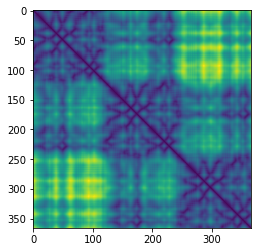

In [46]:
plt.imshow(dmap_sub0)

Calculate the contact map:

In [47]:
h_cont = morphoscanner.backend.helix_recognition.contact_map_helix_torch(dmap_sub0)

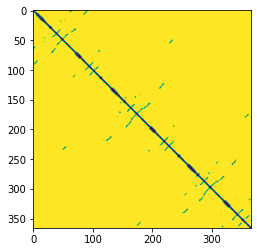

In [48]:
plt.imshow(h_cont)

Perform the pattern recognition:

In [49]:
trace = morphoscanner.backend.helix_recognition.contact_tracer(h_cont)

In [50]:
trace

{'pace_helix': 4.010984864791529,
 'n_carbonalpha': 90,
 'perc_alpha': 24.59016393442623,
 'length_beta': 9.022446574380128,
 'n_carbonbeta': 92,
 'perc_beta': 25.136612021857925,
 'explored_alpha': array([  8,   9,  10,  11,  12,  13,  14,  15,  16,  17,  18,  19,  20,
         29,  30,  31,  41,  51,  73,  74,  75,  76,  77,  78,  79,  80,
         81,  96, 104, 114, 115, 133, 134, 135, 136, 137, 138, 139, 140,
        141, 142, 144, 145, 152, 154, 166, 176, 199, 200, 201, 202, 203,
        204, 205, 206, 222, 245, 246, 247, 251, 261, 262, 263, 264, 265,
        266, 267, 268, 269, 270, 271, 272, 273, 277, 289, 299, 300, 322,
        323, 324, 325, 326, 327, 328, 329, 330, 331, 344, 345, 354],
       dtype=int32),
 'explored_beta': array([ 42,  52,  55,  56,  57,  58,  63,  64,  65,  66,  67,  68,  70,
         71,  85,  87,  88,  89,  91,  97,  99, 106, 107, 108, 109, 110,
        112, 155, 167, 168, 169, 171, 172, 177, 178, 179, 181, 182, 183,
        187, 191, 192, 193, 194, 213, 

And then this becomes the good looking `pandas.DataFrame`:

In [61]:
helix_score_data = pd.DataFrame.from_dict(trace, orient='index').transpose()

In [62]:
helix_score_data

,pace_helix,n_carbonalpha,perc_alpha,length_beta,n_carbonbeta,perc_beta,explored_alpha,explored_beta
0,4.010985,90,24.590164,9.022447,92,25.136612,"[8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,...","[42, 52, 55, 56, 57, 58, 63, 64, 65, 66, 67, 6..."
